<a href="https://colab.research.google.com/github/Group4Columbia/TeamProject_Group4/blob/Jodi-Ann/Data_Cleaning_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #test 
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import tensorflow as tf
%matplotlib inline

In [ ]:
# Vaccination data
data = 'https://covid.ourworldindata.org/data/owid-covid-data.xlsx'
vaccination = 'https://raw.githubusercontent.com/Group4Columbia/TeamProject_Group4/main/Resources/vaccination.csv'
education ='https://raw.githubusercontent.com/Group4Columbia/TeamProject_Group4/main/Resources/covid_impact_education.csv'


In [ ]:
data_df = pd.read_excel(data)
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
hospitalization_data_df = data_df.copy()

In [ ]:
data_df.drop(data_df.columns[data_df.apply(lambda col: col.isnull().sum() > 60,000)], axis=1)
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
data_df['date'] = pd.to_datetime(data_df['date'])
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
data_df[['iso_code', 'continent', 'location', 'tests_units']] = data_df[['iso_code', 'continent', 'location', 'tests_units']].astype(str)
data_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
covid = data_df[['total_vaccinations','people_vaccinated', 'total_deaths', 'total_cases','new_cases','population_density','aged_65_older','gdp_per_capita','cardiovasc_death_rate',	'diabetes_prevalence','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid.head()

,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,population_density,aged_65_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NaN,NaN,NaN,1.0,1.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
1,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
2,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
3,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511
4,NaN,NaN,NaN,1.0,0.0,54.422,2.581,1803.987,597.029,9.59,0.5,64.83,0.511


In [ ]:
correlation_matrix = covid.corr()
print(correlation_matrix)

                            total_vaccinations  ...  human_development_index
total_vaccinations                    1.000000  ...                -0.157504
people_vaccinated                     0.994863  ...                -0.172530
total_deaths                          0.792740  ...                 0.041480
total_cases                           0.794721  ...                 0.034795
new_cases                             0.555068  ...                 0.044367
population_density                   -0.042470  ...                 0.152718
aged_65_older                        -0.114800  ...                 0.778964
gdp_per_capita                       -0.081485  ...                 0.753219
cardiovasc_death_rate                 0.019254  ...                -0.430603
diabetes_prevalence                   0.060164  ...                 0.237566
hospital_beds_per_thousand           -0.109492  ...                 0.558288
life_expectancy                      -0.198767  ...                 0.914489

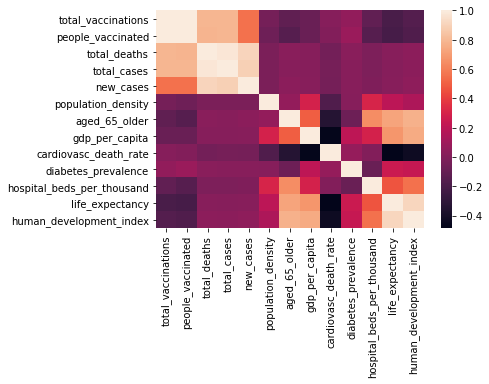

In [ ]:
sn.heatmap(correlation_matrix)
plt.show()

In [ ]:
data_df.dtypes

In [ ]:
covid_data_df.isna().sum()

In [ ]:
covid_data_df.head()

In [ ]:
data_df.isna().sum()

In [ ]:
data_df.dtypes

In [ ]:
vaccination_df = pd.read_csv(vaccination, delimiter=',', skiprows=0, low_memory=False)
vaccination_df.head()

,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,#country+name,#country+code,#date,#total+vaccinations,NaN,NaN,NaN,#total+vaccinations+daily,NaN,NaN,NaN,NaN
1,Albania,ALB,2021-01-10,0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN
2,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN,22.0
3,Albania,ALB,2021-01-12,128,128.0,NaN,NaN,64,0.00,0.00,NaN,22.0
4,Albania,ALB,2021-01-13,188,188.0,NaN,60.0,63,0.01,0.01,NaN,22.0


In [ ]:
vaccination_df.dtypes

location                                object
iso_code                                object
date                                    object
total_vaccinations                      object
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                      object
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
dtype: object

In [ ]:
education1 = pd.read_csv(education,  delimiter=',', skiprows=0, low_memory=False,error_bad_lines=False)
education1.head()

,Date,ISO,Country,Status,Note
0,16/02/2020,ABW,Aruba,Fully open,NaN
1,16/02/2020,AFG,Afghanistan,Fully open,NaN
2,16/02/2020,AGO,Angola,Fully open,NaN
3,16/02/2020,AIA,Anguilla,Fully open,NaN
4,16/02/2020,ALB,Albania,Fully open,NaN


In [ ]:
education1.dtypes

Date       object
ISO        object
Country    object
Status     object
Note       object
dtype: object

In [ ]:
# ChangeDates to date time for all dataset
education1['Date'] = pd.to_datetime(education1['Date'])
education1.head()

,Date,ISO,Country,Status,Note,iso_code
0,2020-02-16,ABW,Aruba,Fully open,NaN,ABW
1,2020-02-16,AFG,Afghanistan,Fully open,NaN,AFG
2,2020-02-16,AGO,Angola,Fully open,NaN,AGO
3,2020-02-16,AIA,Anguilla,Fully open,NaN,AIA
4,2020-02-16,ALB,Albania,Fully open,NaN,ALB


In [ ]:
education1.dtypes

Date       datetime64[ns]
ISO                object
Country            object
Status             object
Note               object
dtype: object

In [ ]:
education1[['iso_code', 'date']] = education1[['ISO', 'Date']]
education1.head()

,Date,ISO,Country,Status,Note,iso_code,date
0,2020-02-16,ABW,Aruba,Fully open,NaN,ABW,2020-02-16
1,2020-02-16,AFG,Afghanistan,Fully open,NaN,AFG,2020-02-16
2,2020-02-16,AGO,Angola,Fully open,NaN,AGO,2020-02-16
3,2020-02-16,AIA,Anguilla,Fully open,NaN,AIA,2020-02-16
4,2020-02-16,ALB,Albania,Fully open,NaN,ALB,2020-02-16


In [ ]:
education_df = education1.drop(columns=["ISO",], axis=1)
education_df.head()

,Date,Country,Status,Note,iso_code,date
0,2020-02-16,Aruba,Fully open,NaN,ABW,2020-02-16
1,2020-02-16,Afghanistan,Fully open,NaN,AFG,2020-02-16
2,2020-02-16,Angola,Fully open,NaN,AGO,2020-02-16
3,2020-02-16,Anguilla,Fully open,NaN,AIA,2020-02-16
4,2020-02-16,Albania,Fully open,NaN,ALB,2020-02-16


In [ ]:
education_new_df = education_df.drop(columns=["Date"], axis=1)
education_new_df.head()

,Country,Status,Note,iso_code,date
0,Aruba,Fully open,NaN,ABW,2020-02-16
1,Afghanistan,Fully open,NaN,AFG,2020-02-16
2,Angola,Fully open,NaN,AGO,2020-02-16
3,Anguilla,Fully open,NaN,AIA,2020-02-16
4,Albania,Fully open,NaN,ALB,2020-02-16


In [ ]:
covid = data_df[['total_vaccinations','people_vaccinated', 'total_cases','new_cases','stringency_index','population','population_density','median_age','aged_65_older',	'aged_70_older',	'gdp_per_capita',	'extreme_poverty','cardiovasc_death_rate',	'diabetes_prevalence','female_smokers',	'male_smokers',	'handwashing_facilities','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid.head()


,total_vaccinations,people_vaccinated,total_cases,new_cases,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,NaN,NaN,1.0,1.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,NaN,NaN,1.0,0.0,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
covid_youth = data_df[['iso_code', 'date','total_vaccinations','people_vaccinated', 'total_deaths', 'total_cases','new_cases', 'new_deaths','population_density','gdp_per_capita', 'handwashing_facilities',	'diabetes_prevalence','hospital_beds_per_thousand',	'life_expectancy',	'human_development_index']]
covid_youth.head()

,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,2020-02-24,NaN,NaN,NaN,1.0,1.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
1,AFG,2020-02-25,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
2,AFG,2020-02-26,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
3,AFG,2020-02-27,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511
4,AFG,2020-02-28,NaN,NaN,NaN,1.0,0.0,NaN,54.422,1803.987,37.746,9.59,0.5,64.83,0.511


In [ ]:
### Left Merge on Education and COVID data on iso_code and date
merged_left_df = pd.merge(left=education_new_df, right=covid_youth, how="left", on=["iso_code", "date"])

In [ ]:
merged_left_df.head()

,Country,Status,Note,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Aruba,Fully open,NaN,ABW,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Fully open,NaN,AFG,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,Fully open,NaN,AGO,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anguilla,Fully open,NaN,AIA,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,Fully open,NaN,ALB,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_left_df.isna().sum()

Country                           0
Status                            0
Note                          85286
iso_code                          0
date                              0
total_vaccinations            84187
people_vaccinated             84490
total_deaths                  34854
total_cases                   27236
new_cases                     27237
new_deaths                    34854
population_density            27302
gdp_per_capita                28687
handwashing_facilities        56958
diabetes_prevalence           27083
hospital_beds_per_thousand    32640
life_expectancy               26700
human_development_index       27820
dtype: int64

In [ ]:
merged_left_df = merged_left_df.fillna(0)
merged_left_df.head()

,Country,Status,Note,iso_code,date,total_vaccinations,people_vaccinated,total_deaths,total_cases,new_cases,new_deaths,population_density,gdp_per_capita,handwashing_facilities,diabetes_prevalence,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Aruba,Fully open,0,ABW,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,Fully open,0,AFG,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Angola,Fully open,0,AGO,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Anguilla,Fully open,0,AIA,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Albania,Fully open,0,ALB,2020-02-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


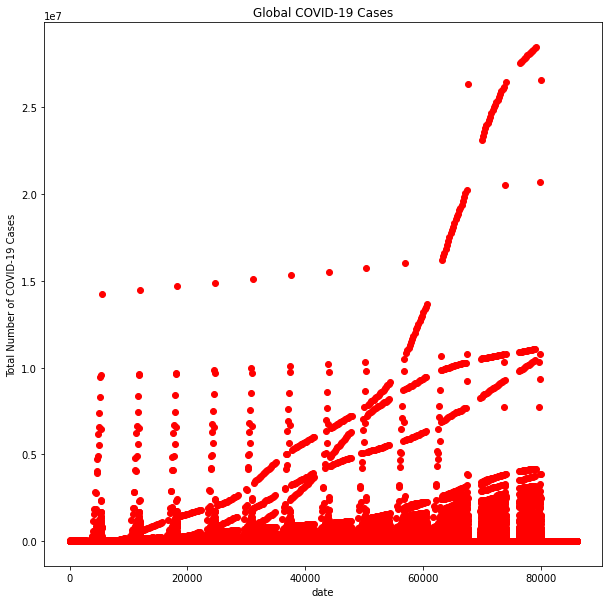

In [ ]:
# TEST
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_left_df['date']
# Add x-axis and y-axis
ax.scatter(merged_left_df.index.values,
        merged_left_df['total_cases'],
        color='red')
# Set title and labels for axes
ax.set(xlabel="date",
       ylabel="Total Number of COVID-19 Cases",
       title="Global COVID-19 Cases")
plt.show()

In [ ]:
### merged_left_df.groupby(["iso_code","total_cases"]).count()

Country  Status  ...  life_expectancy  human_development_index
iso_code total_cases                   ...                                          
ABW      0.0              410     410  ...              410                      410
AFG      0.0               79      79  ...               79                       79
         1.0                6       6  ...                6                        6
         2.0                1       1  ...                1                        1
         4.0                4       4  ...                4                        4
...                       ...     ...  ...              ...                      ...
ZWE      35862.0            1       1  ...                1                        1
         35910.0            1       1  ...                1                        1
         35960.0            1       1  ...                1                        1
         35994.0            1       1  ...                1                        1
         36044.0            1       1  ...                1                        1

[46529 rows x 16 columns]